In [160]:
import pandas as pd

df = pd.read_csv('df.csv')
df.head()

,Fp1_mean,Fp1_std,Fp1_kurtosis,Fp1_skewness,Fp1_quantile,Fp1_ptp_amp,Fp1_pow_freq_bands,Fp1_spect_entropy,Fp1_app_entropy,Fp1_samp_entropy,...,O2_samp_entropy,O2_hurst_exp,O2_hjorth_complexity,O2_hjorth_mobility,O2_line_length,O2_wavelet_coef_energy,O2_higuchi_fd,O2_zero_crossings,O2_svd_fisher_info,age
0,-0.009561,-0.009513,-0.009498,-0.009499,-0.009477,-0.009442,-0.009491,-0.009563,-0.009492,-0.009530,...,-0.001292,-0.001309,-0.001307,-0.001299,-0.001319,-0.001342,-0.001337,-0.001353,-0.001350,29
1,0.000566,0.000523,0.000540,0.000566,0.000589,0.000574,0.000573,0.000570,0.000576,0.000553,...,0.001427,0.001429,0.001420,0.001410,0.001401,0.001432,0.001439,0.001433,0.001404,29
2,-0.000193,-0.000195,-0.000187,-0.000181,-0.000162,-0.000210,-0.000180,-0.000174,-0.000206,-0.000216,...,0.000237,0.000250,0.000270,0.000314,0.000335,0.000314,0.000365,0.000367,0.000342,62
3,-0.009172,-0.009178,-0.009152,-0.009125,-0.009099,-0.009066,-0.009074,-0.009058,-0.009043,-0.009040,...,0.002945,0.002904,0.002897,0.002907,0.002900,0.002891,0.002911,0.002874,0.002835,20
4,-0.001474,-0.001508,-0.001375,-0.001295,-0.001307,-0.001228,-0.001088,-0.001179,-0.001078,-0.001097,...,0.002836,0.002819,0.002829,0.002838,0.002815,0.002836,0.002815,0.002779,0.002789,32


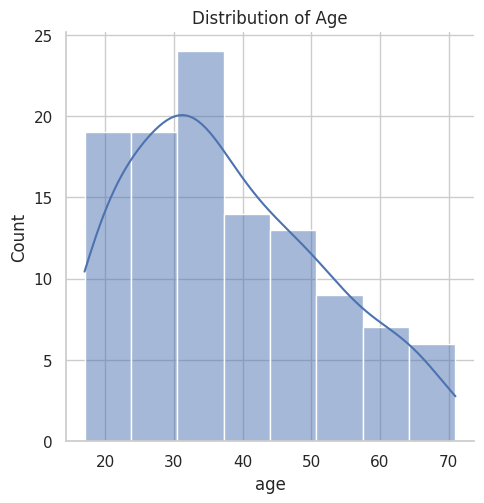

         Fp1_mean     Fp1_std  Fp1_kurtosis  Fp1_skewness  Fp1_quantile  \
count  111.000000  111.000000    111.000000    111.000000    111.000000   
mean    -0.000652   -0.000637     -0.000644     -0.000633     -0.000638   
std      0.007027    0.007020      0.007022      0.007052      0.007055   
min     -0.013806   -0.013780     -0.013680     -0.013757     -0.013846   
25%     -0.005096   -0.005082     -0.005071     -0.005001     -0.004972   
50%     -0.001474   -0.001508     -0.001558     -0.001612     -0.001629   
75%      0.002066    0.002127      0.002104      0.002125      0.002147   
max      0.026581    0.026551      0.026570      0.026518      0.026440   

       Fp1_ptp_amp  Fp1_pow_freq_bands  Fp1_spect_entropy  Fp1_app_entropy  \
count   111.000000          111.000000         111.000000       111.000000   
mean     -0.000642           -0.000641          -0.000635        -0.000635   
std       0.007055            0.007061           0.007069         0.007069   
min      -0.

In [161]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the target variable 'age'
sns.displot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Print summary statistics of the features
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Number of missing values in the dataset: {missing_values}")
print(f"Shape of the dataset: {df.shape}")

In [168]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# We are going to select the top k features based on their mutual information with the target variable 'age'
selector = SelectKBest(mutual_info_regression, k=100)

# Fit the selector to the data
X = df.drop('age', axis=1)
y = df['age']
selector.fit(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Create a new dataframe with only the selected features
selected_df = df.iloc[:,selected_features]

# Add the target variable 'age' to this dataframe
selected_df['age'] = df['age']

# Show the selected features
selected_df.head()

/tmp/ipykernel_65/3661920877.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['age'] = df['age']


,C1_mean,C1_std,C1_kurtosis,C1_skewness,C1_quantile,C1_ptp_amp,C1_pow_freq_bands,C1_spect_entropy,C1_app_entropy,C1_samp_entropy,...,Fpz_zero_crossings,Fpz_svd_fisher_info,AF8_std,AF8_kurtosis,AF8_app_entropy,AF8_hjorth_complexity,AF8_hjorth_mobility,C2_hurst_exp,P8_mean,age
0,-0.000684,-0.000718,-0.000732,-0.000738,-0.000731,-0.000749,-0.000775,-0.000767,-0.000785,-0.000772,...,-0.005681,-0.005665,-0.003875,-0.003870,-0.003933,-0.003951,-0.003899,0.002780,-0.000880,29
1,0.003562,0.003578,0.003594,0.003612,0.003569,0.003588,0.003585,0.003584,0.003567,0.003568,...,-0.004304,-0.004296,-0.008763,-0.008734,-0.008620,-0.008643,-0.008619,0.007501,-0.005543,29
2,0.003930,0.003924,0.003941,0.003935,0.003940,0.003961,0.003946,0.003963,0.003966,0.003964,...,-0.004641,-0.004623,-0.008415,-0.008442,-0.008430,-0.008472,-0.008674,0.000705,-0.009155,62
3,0.002918,0.002893,0.002896,0.002901,0.002875,0.002871,0.002863,0.002846,0.002845,0.002852,...,-0.004304,-0.004294,-0.000176,-0.000175,-0.000035,0.000099,0.000135,0.001138,-0.002666,20
4,0.001492,0.001486,0.001455,0.001439,0.001429,0.001400,0.001385,0.001370,0.001357,0.001371,...,-0.002891,-0.002856,-0.002904,-0.002883,-0.002935,-0.002885,-0.002863,0.003207,0.000200,32


In [169]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Make sure that selected_df is a copy, not a view
selected_df = selected_df.copy()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df.drop('age', axis=1))

# Apply PCA
pca = PCA(n_components=4) 
pca_features = pca.fit_transform(scaled_features)

# Add the PCA components to the original DataFrame
for i in range(pca_features.shape[1]):
    selected_df[f'PC{i+1}'] = pca_features[:, i]
    
selected_df.shape

(111, 105)

In [170]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import numpy as np

def compare_models(df):
    # Define models
    models = [
        ("Dummy", DummyRegressor(strategy="mean")),
        ("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge(random_state=42)),
        ("Lasso Regression", Lasso(random_state=42)),
        ("ElasticNet", ElasticNet(random_state=42)),
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("AdaBoost", AdaBoostRegressor(random_state=42)),
        ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
        ("XGBoost", XGBRegressor(random_state=42)),
        ("SVM", SVR()),
        ("Decision Tree", DecisionTreeRegressor(random_state=42))
    ]

    # Define features and target
    X = df.loc[:, df.columns != 'age']
    y = df['age']

    # Initialize an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=["model", "MAE"])

    # Apply 5-fold cross validation and store MAE
    for model_name, model in models:
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        mae = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
        results_df = pd.concat([results_df, pd.DataFrame({"model": [model_name], "MAE": [-mae.mean()]})], ignore_index=True)

    # Sort the DataFrame by MAE
    results_df = results_df.sort_values(by="MAE", ascending=True)

    def highlight_rows(row):
        if row['model'] == 'Dummy':
            return ['background-color: red']*2
        else:
            return ['background-color: white']*2

    # Return the styled DataFrame
    return results_df.style.apply(highlight_rows, axis=1)

# Use the function
compare_models(selected_df)

,model,MAE
9,SVM,11.165101
4,ElasticNet,11.319560
2,Ridge Regression,11.334589
3,Lasso Regression,11.342098
0,Dummy,11.659533
5,Random Forest,12.188336
6,AdaBoost,12.342140
7,GradientBoosting,12.963295
8,XGBoost,13.344670
10,Decision Tree,16.696443


In [181]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over for each model
hyperparameters = {
    "AdaBoost": {
        "n_estimators": [2, 3, 5, 10, 25, 50, 75, 100, 150, 200],
        "learning_rate": [0.001, 0.01, 0.1, 1.0]
    },
    
    "SVM": {
        "C": [0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    
    "Ridge Regression": {
        "alpha": [0.0001, 0.001, 0.01, 0.05, 0.08, 0.1, 0.5, 1, 10, 100],
    },
    
    "Lasso Regression": {
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    },

    "ElasticNet": {
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
    }

}

# Define models
models = {
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVM": SVR(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet": ElasticNet(random_state=42)
}

# Define features and target
X = df_selected.loc[:, df_selected.columns != 'age']
y = df_selected['age']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["model", "best_params", "MAE"])

# For each model, perform grid search and store the results
for model_name in models.keys():
    model = models[model_name]
    param_grid = hyperparameters[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    mae = -grid_search.best_score_
    new_row = pd.DataFrame({"model": [model_name], "best_params": [best_params], "MAE": [mae]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Sort the DataFrame by MAE
results_df = results_df.sort_values(by="MAE", ascending=True)

# Print the results
results_df.head(6)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e+03, tolerance: 1.825e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e+03, tolerance: 1.738e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.656e+03, tolerance: 1.761e+00

,model,best_params,MAE
2,Ridge Regression,{'alpha': 0.001},10.831558
4,ElasticNet,"{'alpha': 0.0001, 'l1_ratio': 0.9}",10.833005
3,Lasso Regression,{'alpha': 0.001},10.847979
1,SVM,"{'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}",11.319310
0,AdaBoost,"{'learning_rate': 0.01, 'n_estimators': 100}",11.605282
